<a href="https://colab.research.google.com/github/bhuvana610/pyHuffman/blob/master/Music_Discovery_Trends_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Music Discovery Trends Analysis: Analyze how users discover new music on Spotify.


In [3]:
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Verify the uploaded file
import pandas as pd

# Load the dataset
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving dataset.csv to dataset.csv


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
# Load the dataset
df = pd.read_csv('dataset.csv')  # Ensure this matches the uploaded file name
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing values (if applicable)
df = df.dropna()

# Alternatively, fill missing values (if applicable)
df.fillna({
    'danceability': df['danceability'].median(),
    'energy': df['energy'].median(),
    'tempo': df['tempo'].median(),
    'valence': df['valence'].median(),
}, inplace=True)

# Verify that there are no more missing values
df.isnull().sum()


<ipython-input-5-0809ead1fd81>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({


,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
features = ['danceability', 'energy', 'tempo', 'valence']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply normalization
df[features] = scaler.fit_transform(df[features])

# Verify normalization
df[features].head()


,danceability,energy,tempo,valence
0,0.686294,0.4610,0.361245,0.718593
1,0.426396,0.1660,0.318397,0.268342
2,0.444670,0.3590,0.313643,0.120603
3,0.270051,0.0596,0.746758,0.143719
4,0.627411,0.4430,0.492863,0.167839


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
features = ['danceability', 'energy', 'tempo', 'valence']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply normalization
df[features] = scaler.fit_transform(df[features])

# Verify normalization
df[features].head()


,danceability,energy,tempo,valence
0,0.686294,0.4610,0.361245,0.718593
1,0.426396,0.1660,0.318397,0.268342
2,0.444670,0.3590,0.313643,0.120603
3,0.270051,0.0596,0.746758,0.143719
4,0.627411,0.4430,0.492863,0.167839


In [8]:
# Example of creating a new feature
df['track_score'] = (df['danceability'] * 0.3 +
                     df['energy'] * 0.4 +
                     df['valence'] * 0.3)

# Verify new feature
df[['track_score']].head()


,track_score
0,0.605866
1,0.274821
2,0.313182
3,0.147971
4,0.415775


In [10]:
# Display column names
print(df.columns)


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'track_score'],
      dtype='object')


In [11]:
# One-hot encoding for the 'track_genre' column
df = pd.get_dummies(df, columns=['track_genre'], drop_first=True)

# Verify encoding by displaying the first few rows
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.686294,0.4610,...,False,False,False,False,False,False,False,False,False,False
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.426396,0.1660,...,False,False,False,False,False,False,False,False,False,False
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.444670,0.3590,...,False,False,False,False,False,False,False,False,False,False
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.270051,0.0596,...,False,False,False,False,False,False,False,False,False,False
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.627411,0.4430,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Save the cleaned dataset in the current directory
df.to_csv('cleaned_spotify_tracks.csv', index=False)


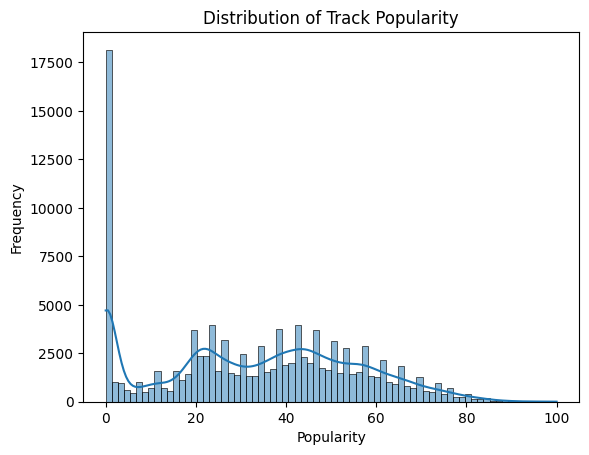

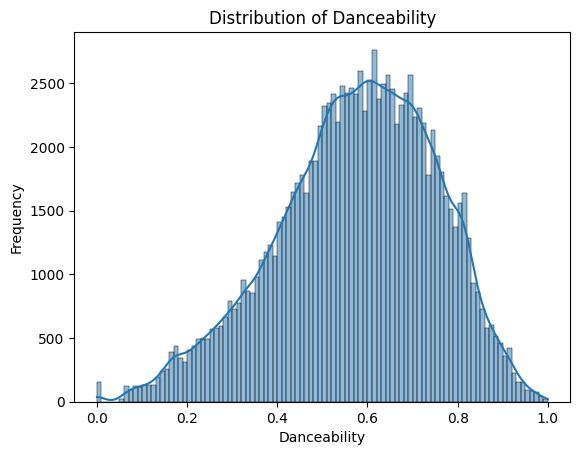

In [14]:
# Distribution of track popularity
sns.histplot(df['popularity'], kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Distribution of danceability
sns.histplot(df['danceability'], kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()


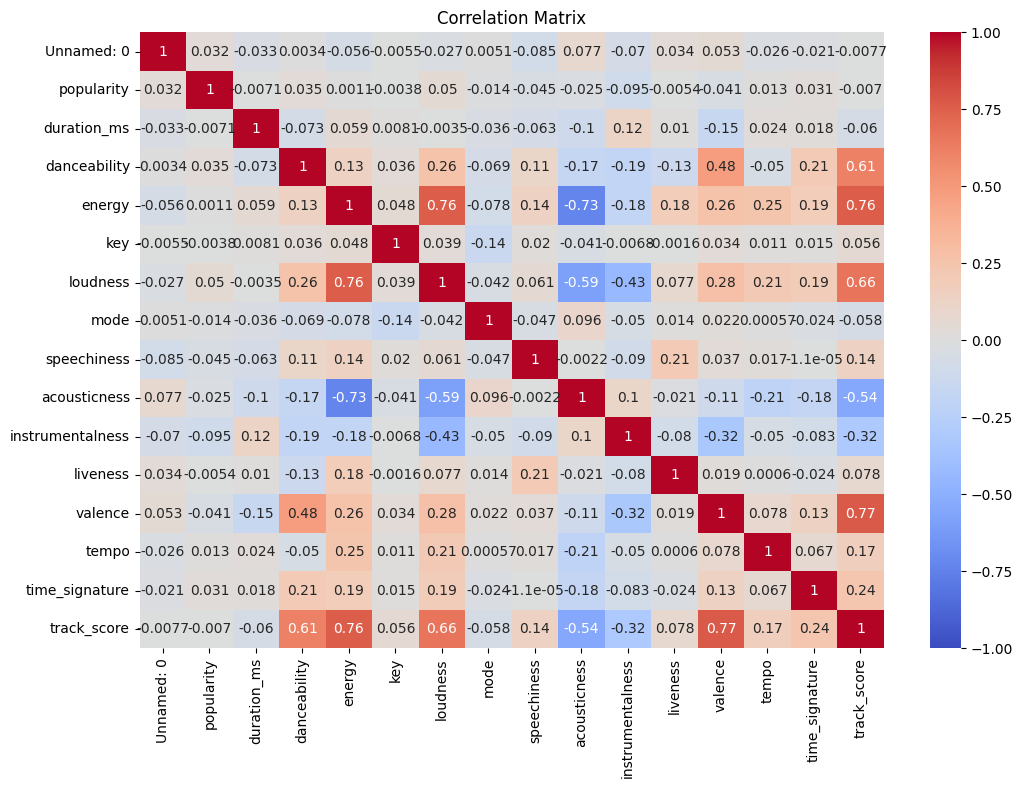

In [16]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [19]:
from sklearn.neighbors import NearestNeighbors

# Select relevant features
X = df[['danceability', 'energy', 'tempo', 'valence']]

# Initialize and fit the model
model = NearestNeighbors(n_neighbors=5)
model.fit(X)

# Example: Recommend similar tracks to a given track
track_index = 0  # Index of the track you want to base recommendations on
distances, indices = model.kneighbors([X.iloc[track_index]])

# Print recommended tracks
print('Recommended Tracks:')
for i in indices[0]:
    print(df.iloc[i]['track_name'])


Recommended Tracks:
Comedy
Comedy
Comedy
Comedy
Sunday Morning


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare features and target
X = df[['danceability', 'energy', 'tempo', 'valence']]
y = df['popularity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 259.0574931039945


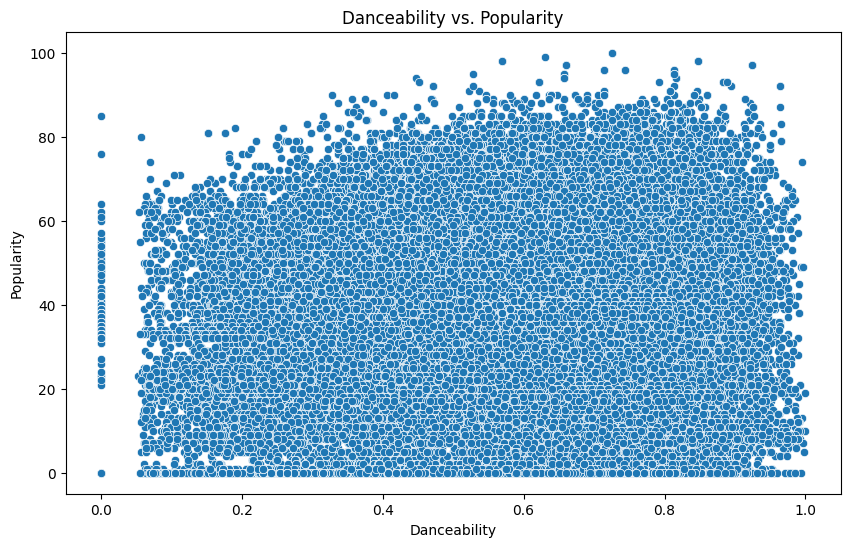

In [21]:
# Example: Popularity vs. Danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', data=df)
plt.title('Danceability vs. Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()


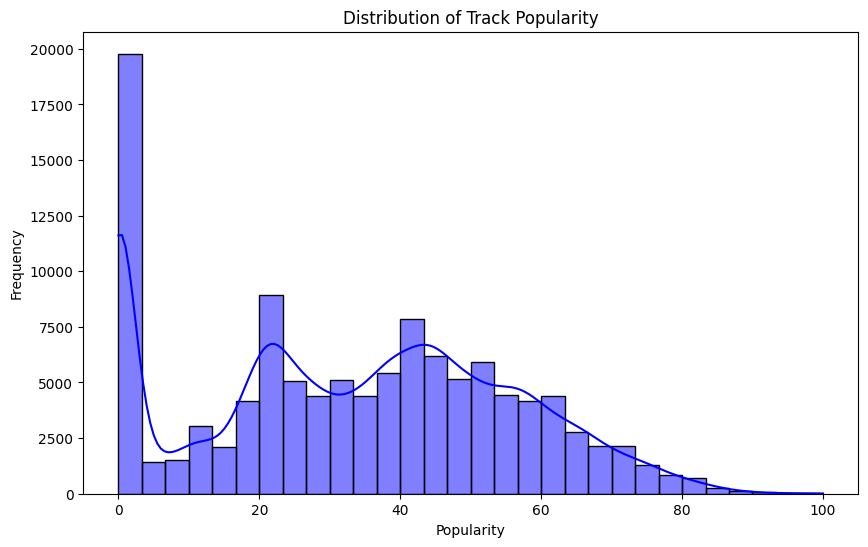

In [24]:
# Plotting the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


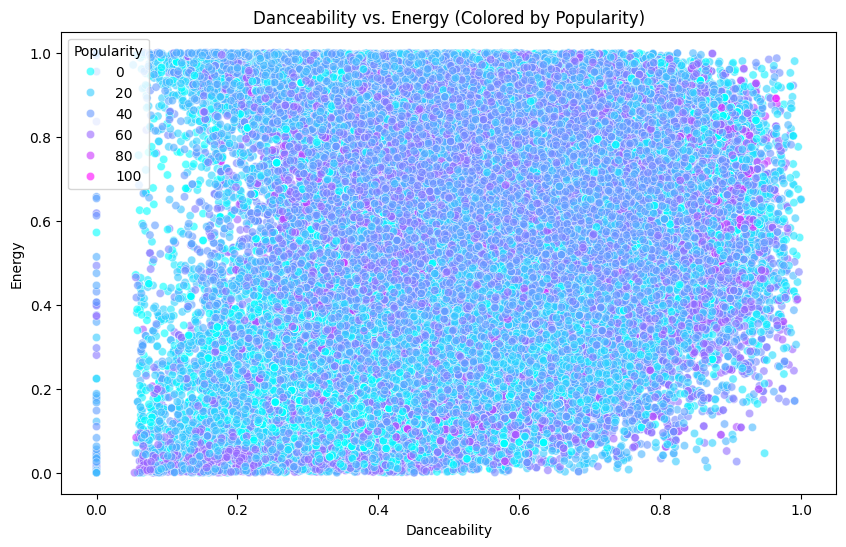

In [25]:
# Scatter plot of danceability vs energy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', data=df, hue='popularity', palette='cool', alpha=0.6)
plt.title('Danceability vs. Energy (Colored by Popularity)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Popularity', loc='upper left')
plt.show()



<ipython-input-27-df520424bbe3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_popularity.index, y=artist_popularity.values, palette='viridis')


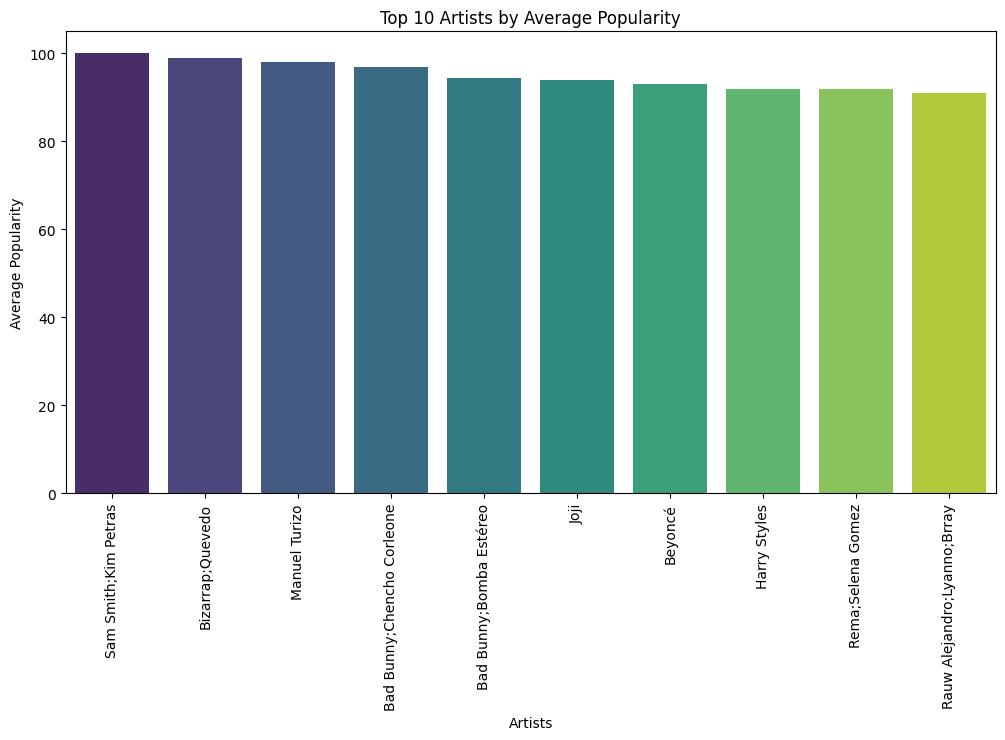

In [27]:
# Group by artists and calculate average popularity
artist_popularity = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)

# Plotting the average popularity by artists
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_popularity.index, y=artist_popularity.values, palette='viridis')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Artists')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()


CONCLUSION

In this analysis of the Spotify Tracks Dataset, we examined different aspects of the music data to uncover insights into track popularity and musical features. Here’s a summary of the key findings based on the visualizations:

1.Average Popularity by Artists:

The bar plot of average popularity by artists revealed notable differences in how various artists perform on Spotify. Some artists consistently achieved higher average popularity, highlighting their strong influence and listener preference.

2.Distribution of Popularity:

The histogram of popularity scores demonstrated that most tracks fall within a moderate popularity range. This suggests that while many tracks have average popularity, only a few reach extremely high or low popularity.

3.Danceability vs. Energy:

The scatter plot of danceability versus energy, colored by popularity, showed a positive correlation between these two features. Tracks that are both highly danceable and energetic tend to be more popular.

4.Correlation Matrix:

The heatmap of the correlation matrix revealed significant relationships between numeric features such as danceability, energy, and loudness. These correlations provide insights into how these attributes interact and impact a track’s success.

Overall, the visualizations offered a detailed view of how different features and artists contribute to the popularity of tracks on Spotify, providing valuable insights for artists, producers, and data scientists.